### on this jupyter there will be analysis for BANK CUSTOMER SEGMENTATION. 
the first step to is importing necessary Libraries:
- Pandas --> for dealing with Dataframe
- Numpy --> providing linear algebra
- seaborn --> create visualization 
- Matplotlib --> basic tools for visualization 
- scikit-learn --> machine learning library

In [82]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings 
warnings.filterwarnings("ignore")

D:\ProgramData\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\ProgramData\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
data = pd.read_csv('german_credit_data.csv',index_col='Unnamed: 0')

### simple EDA for existing Data

In [11]:
data.shape

(1000, 9)

In [10]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [13]:
data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

#### using Subplot 

In [14]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

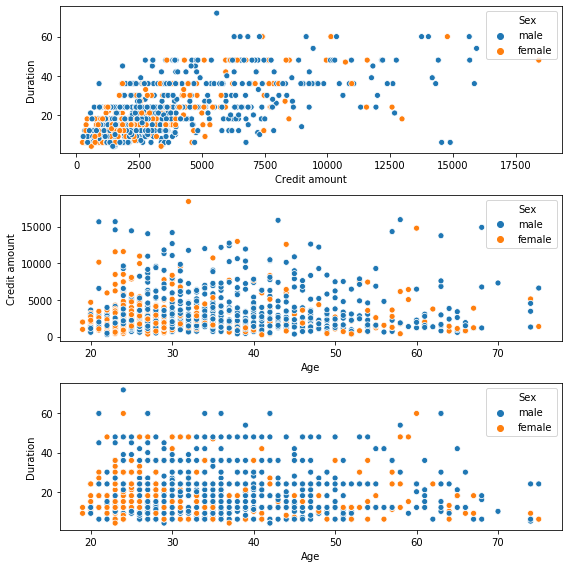

In [15]:
scatters(data,'Sex')

the general impression is that the women tend to be younger than the men, however the top plot shows that there is no clear defference between mena and women in terms of amount and duration of credit/ from visual inspection  , it seems that there is some positive correlation duration and amount of credit , what makes sense


now we need to check the linear correlatoin between credit amount and duration 

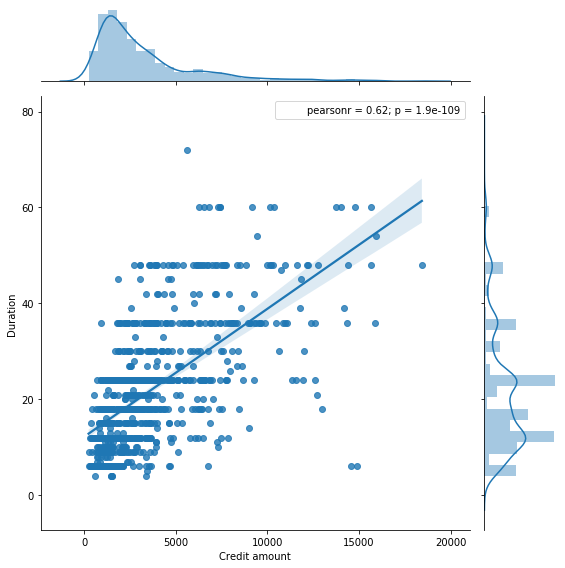

In [28]:
import scipy.stats as stats



r1= sns.jointplot(x='Credit amount',y='Duration',data=data, kind='reg',height=8)
r1.annotate(stats.pearsonr)

The plot above shows a linear correlation with Pearson value of 0.62 and very small p-value. That make’s sense because usually, people take bigger credits for longer periods. Below I will analyse linear regression plots with various categorisations

In [30]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


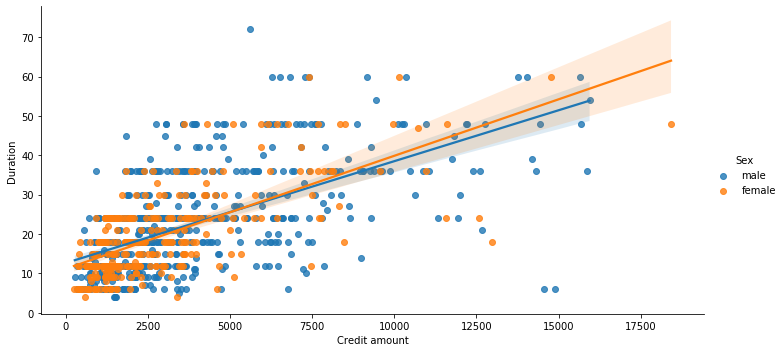

In [38]:
sns.lmplot(x='Credit amount',y='Duration',hue='Sex',data=data,
          aspect=2,)

#### Insights : 
the plot above indicates that there is no significant difference between man and women

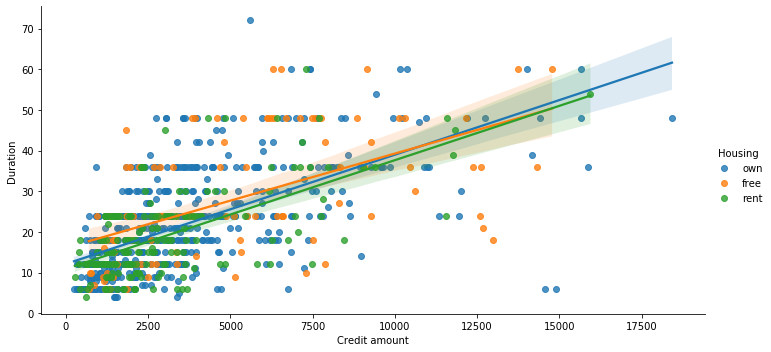

In [41]:
sns.lmplot(x='Credit amount',y='Duration',hue='Housing',data=data,
          aspect=2)

#### Insights : 
from above result also there is no significance different between housing categories

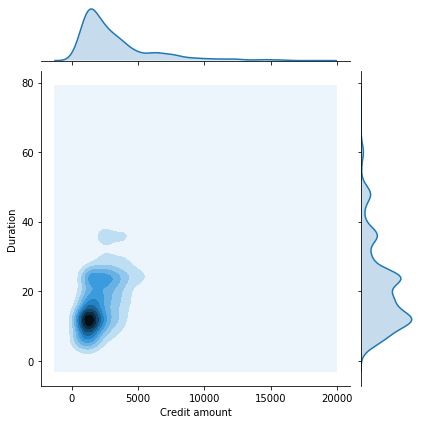

In [46]:
sns.jointplot('Credit amount','Duration',data=data,kind='kde')

[Text(0, 0, 'car'),
 Text(0, 0, 'radio/TV'),
 Text(0, 0, 'furniture/equipment'),
 Text(0, 0, 'business'),
 Text(0, 0, 'education'),
 Text(0, 0, 'repairs'),
 Text(0, 0, 'domestic appliances'),
 Text(0, 0, 'vacation/others')]

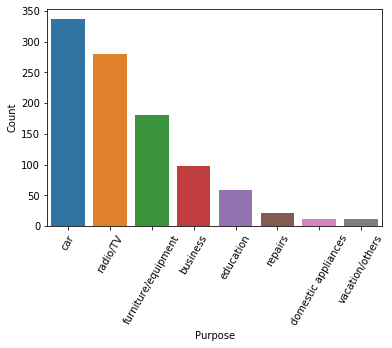

In [62]:
n_credits= data.groupby('Purpose').count()['Age'].rename('Count').reset_index()
n_credits.sort_values('Count',ascending=False,inplace=True)
bar = sns.barplot(x='Purpose',y='Count',data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(),rotation = 60)


The barplot above shows how many credits were granted for various purposes. Most of credits were granted for car and radio/TV.

Now I will generate boxplots for detailed analysis of categorical variable

In [63]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

## the boxplots show the detailed distribution of the category and sex ad credit amount

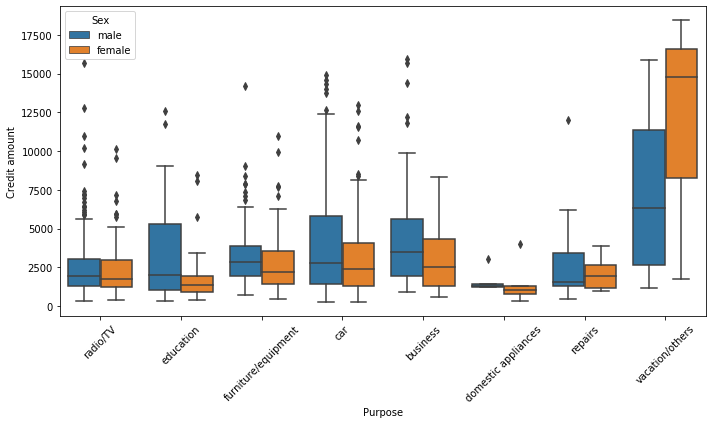

In [64]:
boxes('Purpose','Credit amount','Sex')

The plot above shows that the biggest amounts are taken for vacations/others, the smallest for domestic appliances. Most of them have outliers on the upper side of the boxes (higher amounts). In most of the cases there is no difference between men and women, despite category vacation/others. But one must remember that there was very little number of credits granted in this category.

### boxes plot for purpose and duration and sex

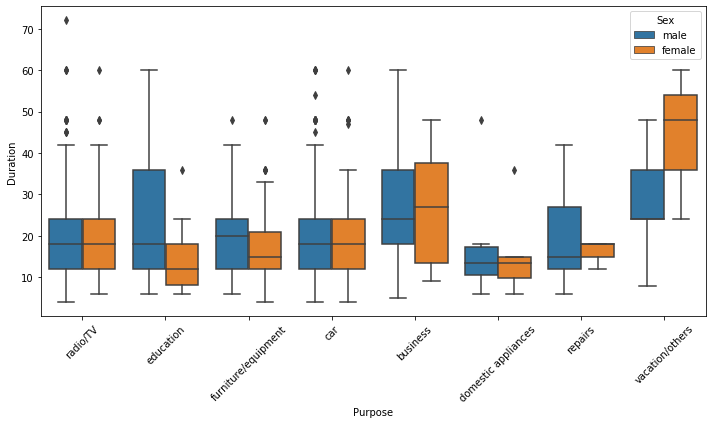

In [65]:
boxes('Purpose','Duration','Sex')

The boxplot above indicates that generally there is no difference in credit duration between men and women. We can’t see also clear trend between categories with observations that the shortest duration is for domestic appliances. It makes sense as it is in agreement with insights from the previous graph (credit amount) – in this category, there are the lowest amounts of credits.

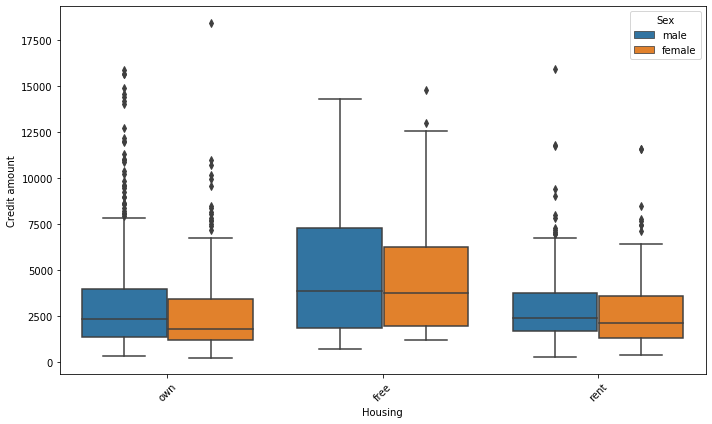

In [66]:
boxes('Housing','Credit amount',"Sex")

In terms of housing category, there is no big difference despite people having “free” housing tend to take slightly bigger credit amounts.

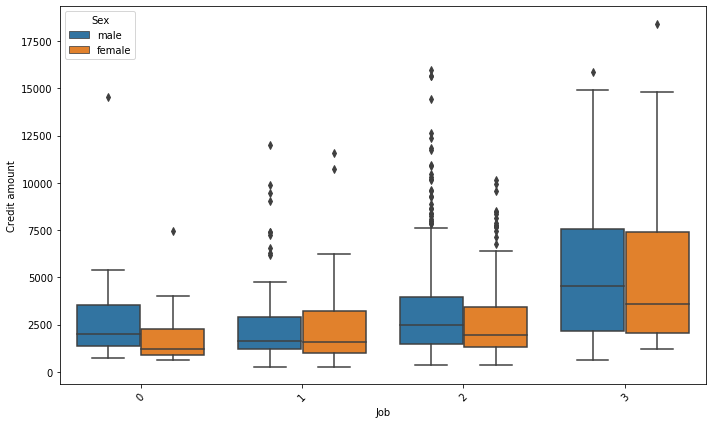

In [68]:
boxes('Job','Credit amount','Sex')

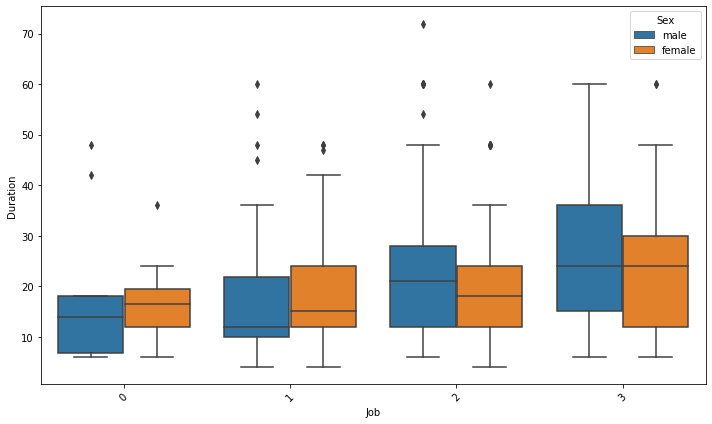

In [69]:
boxes('Job','Duration','Sex')

In terms of job category once again there is no difference between men and women, but we can see that job category 3 tends to take bigger credit amounts for longer duration.

### Clustering with Kmeans


for clustering , i will create a subset containing only numerical variables(Age,credit amount and duration)

In [73]:
cluster_data= data[['Age','Credit amount','Duration']]


### create function that get distribution of a column

In [77]:
def distibrutionplot (df):
    fig,(ax1,ax2,ax3)= plt.subplots(3,1,figsize=(8,8))
    sns.distplot(df['Age'],ax=ax1)
    sns.distplot(df['Credit amount'],ax=ax2)
    sns.distplot(df['Duration'],ax=ax3)
    plt.tight_layout()

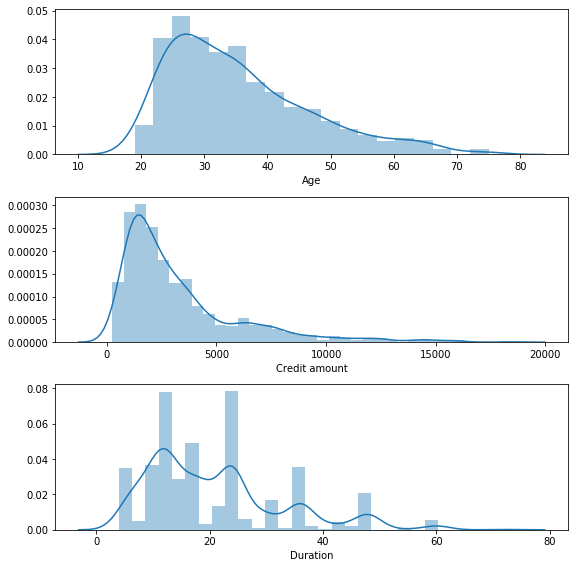

In [78]:
distibrutionplot(cluster_data)

the data is right-skewed , so it will be better if we use logarithmic tranformation to get normal 

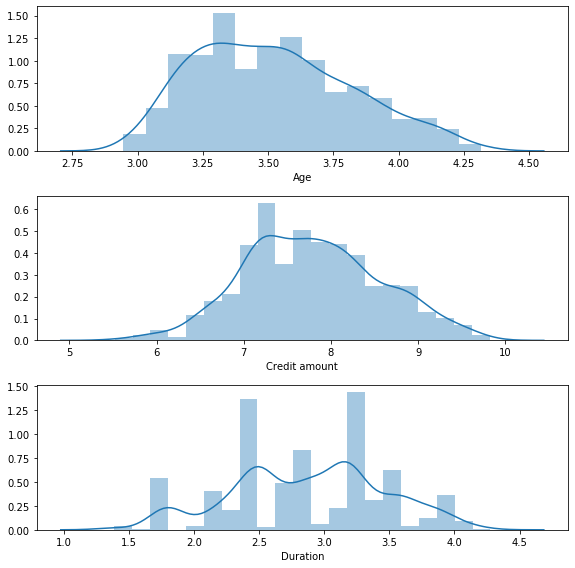

In [80]:
cluster_log= np.log(cluster_data)
distibrutionplot(cluster_log)


The next step will be centering and scaling of variables – it is required by KMeans algorithm. We will use for that a StandardScaler from sklearn library.

In [86]:
scaler= StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

In [89]:
clusters_range= [2,3,4,5,6,7,8,9,10]
resulta= []
for c in clusters_range:
    kmeans= KMeans(n_clusters=c).fit(cluster_scaled)
    resulta.append(kmeans.inertia_)

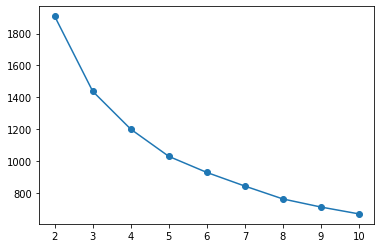

In [92]:
plt.plot(clusters_range,resulta,marker= 'o')

The plot above shows that inertia decreases with increasing number of clusters.

This method allows for assessment of cluster separations and fitting of each observation in its own cluster. The highest score the better. I will perform this analysis for various seeds as well.

In [93]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [95]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])


In [99]:

result = pd.DataFrame(results,columns=['n_cluster','seed','silhoutte_score'])
pivot= pd.pivot_table(result,index='n_cluster',
              columns='seed',
              values= 'silhoutte_score')



### plotting

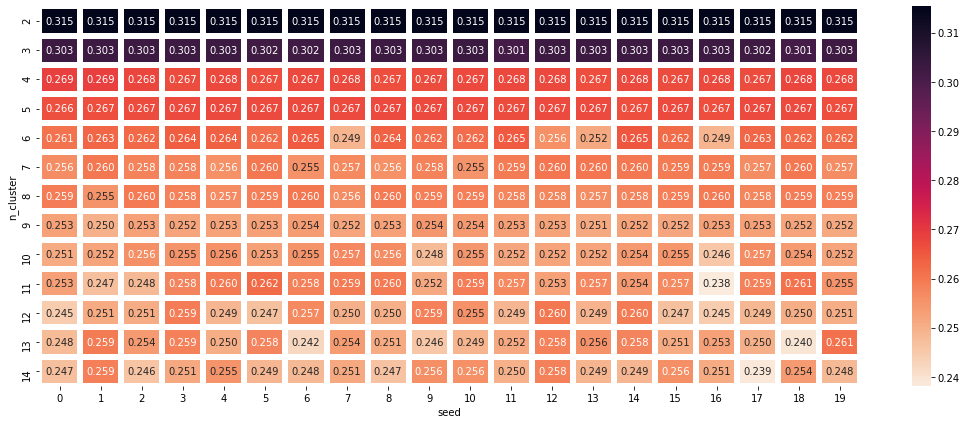

In [104]:

plt.figure(figsize=(15,6))
sns.heatmap(pivot,annot=True,linewidths=5,fmt='.3f',cmap=sns.cm.rocket_r)
plt.tight_layout()

The heatmap above shows silhouette scores for various combinations of random state and number of clusters. The highest scores are for 2 and 3 clusters and they are relatively insensitive to seed.

I will chose 3 clusters to get more insight into data.

In [105]:
KMeans(n_clusters=3,random_state=1).fit(cluster_scaled)

KMeans(n_clusters=3, random_state=1)

In [106]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [107]:
cluster_data

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.30318933408774545


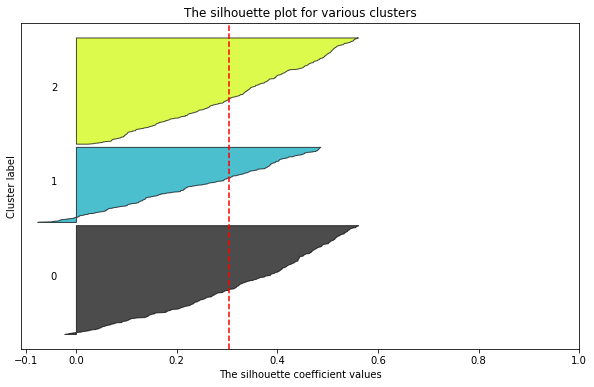

In [108]:
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


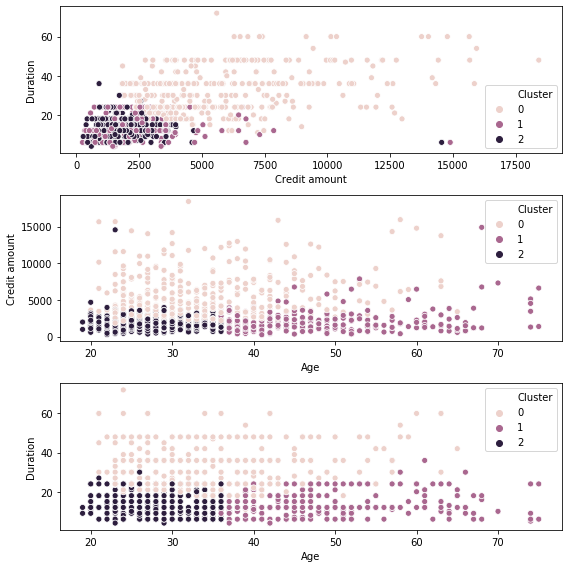

In [109]:
scatters(clustered_data, 'Cluster')

Plots above show three created clusters. Two bottom ones show relatively clear separation of clusters, but it is no so evident on the top one.

I will generate now a heatmap plot for easier business interpretation of customer segmentation.

#### mean of each category 

In [110]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,34.0,5665.4,32.2
1,48.7,1979.7,13.9
2,27.8,1732.2,14.2


### summary 

- Cluster 0 – lower mean of credit amount, short duration, older customers 

- Cluster 1 – high mean of credit amount, long duration, middle-aged customers

- Cluster 2 - lower mean of credit amount, short duration, young customers

https://www.kaggle.com/paulinan/bank-customer-segmentation